<a href="https://colab.research.google.com/github/hajirafkhalid2219/AI-VIDYA/blob/main/house_price_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Load data set table and 5 columns

In [2]:
df = pd.read_csv('/content/Housing.csv')
header = df.columns
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Define data types

In [3]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
#Convert dat types to numbers
# Separate binary 'yes'/'no' columns from 'furnishingstatus'
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in yes_no_cols:
    df[col] = df[col].replace({'yes': 1, 'no': 0})

# Ordinally encode 'furnishingstatus'
df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

print(df.head(5))

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


/tmp/ipython-input-2286671200.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-2286671200.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})


In [5]:
#Data preprocessing
print(df.isnull().sum())
#No cleaning required

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
#Train Test
#This code segment is performs 'train-test split' for your machine learning model. It divides your dataset into two subsets:
#Training Set (X_train, y_train): This portion of the data (80% in this case, as test_size=0.2) will be used to train your model.
#Testing Set (X_test, y_test): This smaller portion (20%) is kept separate and will be used to evaluate how well your trained model performs on unseen data
# Define X and y from the entire DataFrame for proper train-test split
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
#Train Linear Regression Model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [7]:
df = pd.DataFrame(df)
# Select the top 5 rows for now
top30 = df.head(30)
#print("Top 30 Rows:\n", top30)
# Define features (X) and target (y)
# Predicting 'price' based on 'area' and 'bedrooms'
X = top30[['area', 'bedrooms','bathrooms','stories','guestroom','hotwaterheating','airconditioning']]
y = top30['price']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values using the same top 30 rows
predictions = model.predict(X)

# View Results
top30 = top30.copy()
top30['Predicted_Price'] = predictions
print("\nPredictions for Top 30 Rows:\n", top30[['price', 'Predicted_Price']])


Predictions for Top 30 Rows:
        price  Predicted_Price
0   13300000     1.029766e+07
1   12250000     1.124540e+07
2   12250000     9.716535e+06
3   12215000     1.012987e+07
4   11410000     9.282500e+06
5   10850000     9.920546e+06
6   10150000     1.088198e+07
7   10150000     1.119495e+07
8    9870000     9.324499e+06
9    9800000     9.488228e+06
10   9800000     9.765445e+06
11   9681000     9.015263e+06
12   9310000     1.007119e+07
13   9240000     9.023395e+06
14   9240000     9.583125e+06
15   9100000     9.508542e+06
16   9100000     9.571797e+06
17   8960000     1.016056e+07
18   8890000     9.071735e+06
19   8855000     9.686630e+06
20   8750000     8.357563e+06
21   8680000     9.056809e+06
22   8645000     8.772144e+06
23   8645000     9.069264e+06
24   8575000     9.833628e+06
25   8540000     9.568091e+06
26   8463000     9.503669e+06
27   8400000     9.136845e+06
28   8400000     9.674779e+06
29   8400000     1.000634e+07


In [8]:
from sklearn.linear_model import LinearRegression

# Re-initialize and train the model using the correct X_train and y_train
# This ensures the model is trained on all features present in X_test
model = LinearRegression()
model.fit(X_train, y_train)

# For printing coefficients, use the columns from X_train which match the newly trained model
features_for_coef = X_train.columns

print("Coeffcients:", model.coef_)
print("Intercept:", model.intercept_)
for feature, coef in zip(features_for_coef, model.coef_):
    print(f"{feature}: {coef}")

# Predictions
y_pred = model.predict(X_test)
print(y_pred)

# Compare
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison) # Fixed typo: comparison_df to comparison
print(comparison.head())

Coeffcients: [2.35848772e+02 7.85744924e+04 1.09711727e+06 4.06223164e+05
 3.66824192e+05 2.33146766e+05 3.93159779e+05 6.87881311e+05
 7.85550579e+05 2.25756514e+05 6.29901661e+05 2.10397118e+05]
Intercept: -127711.16739244293
area: 235.84877178813724
bedrooms: 78574.49238760071
bathrooms: 1097117.2661479574
stories: 406223.16446288454
mainroad: 366824.1923924831
guestroom: 233146.76562655077
basement: 393159.7787258404
hotwaterheating: 687881.3109570158
airconditioning: 785550.5792954286
parking: 225756.5139762815
prefarea: 629901.6608459124
furnishingstatus: 210397.11827155566
[5203691.70963178 7257004.02115475 3062828.59668171 4559591.65374424
 3332932.30559782 3563080.67918997 5645466.31219972 6413979.66873635
 2755831.54819    2668938.66075228 9570600.29915353 2827431.50860062
 3195686.2583409  3352263.99438471 3713879.49996131 5301088.24435749
 2987920.2666968  4810799.8212371  4383031.70489929 3525092.18938646
 5796259.50068013 5840000.70299301 2760214.608641   4762590.14920608

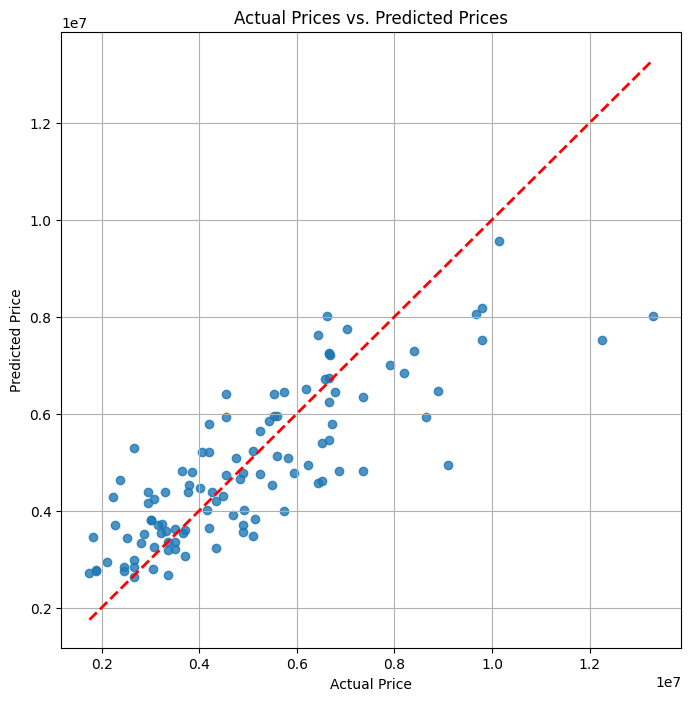

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.grid(True)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

# Make predictions on the validation set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R2 Score:", r2_score(y_test,y_pred))
print("Root Mean Squared Error:", root_mean_squared_error(y_test,y_pred))

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, y_train) # Corrected Y_train to y_train
Y_pred = model_SVR.predict(X_test) # Corrected X_valid to X_test

print(f'Mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, Y_pred)}') # Corrected Y_valid to y_test and added f-string

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train) # Corrected Y_train to y_train
Y_pred = model_RFR.predict(X_test) # Corrected X_valid to X_test

print(f'Mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, Y_pred)}') # Corrected Y_valid to y_test and added f-string

Mean Absolute Error: 979679.6912959901
Mean Squared Error: 1771751116594.0352
R2 Score: 0.6494754192267803
Root Mean Squared Error: 1331071.4167895108
Mean_absolute_percentage_error: 0.3671300627421114
Mean_absolute_percentage_error: 0.2335504172878425


In [11]:
#Predict for new house
# Assuming for basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus if not specified
# The order of features should match X: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
NewHOUSE_data = [[6500, 3, 2, 4, 1, 1, 0, 1, 0, 1, 0, 2]]
# Create a DataFrame with feature names for prediction
NewHOUSE_df = pd.DataFrame(NewHOUSE_data, columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'])
prediction=model.predict(NewHOUSE_df)
print("Predicted House Price:",prediction)

Predicted House Price: [7394559.53603615]


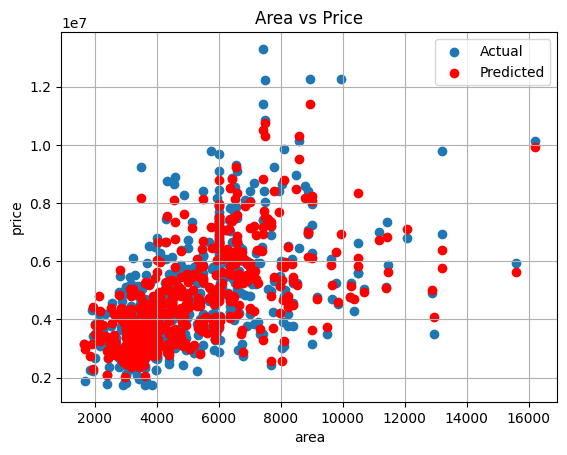

In [12]:
#Visualisation
import matplotlib.pyplot as plt

# Define X_full explicitly for the entire dataframe with all features used for training
X_full_df = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
predictions_full = model_RFR.predict(X_full_df)

plt.scatter(df['area'],df['price'],label="Actual")
plt.scatter(df['area'],predictions_full,color='red',label="Predicted")
plt.xlabel('area')
plt.ylabel('price')
plt.title('Area vs Price')
plt.grid(True)
plt.legend()
plt.show()